In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Harsha1/Downloads/archive (17)/Real_Estate_Sales_2001-2020_GL.csv")

In [3]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,Nan,1
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,0
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,1
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,1
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997213 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997213 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     997213 non-null  object 
 9   Residential Type  997213 non-null  object 
 10  Years until sold  997213 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.7+ MB


In [23]:
#Average assessed value of properties from year to year?
#Average sale amount of properties from year to year?
#Average sales ratio of properties from year to year?
#How long, on average, did it take for the different property types to get sold?
#How long, on average, did it take for the different residential types to get sold?
#Which towns saw the most property sales in 2021?
a=df.groupby("List Year")["Assessed Value"].mean().reset_index()

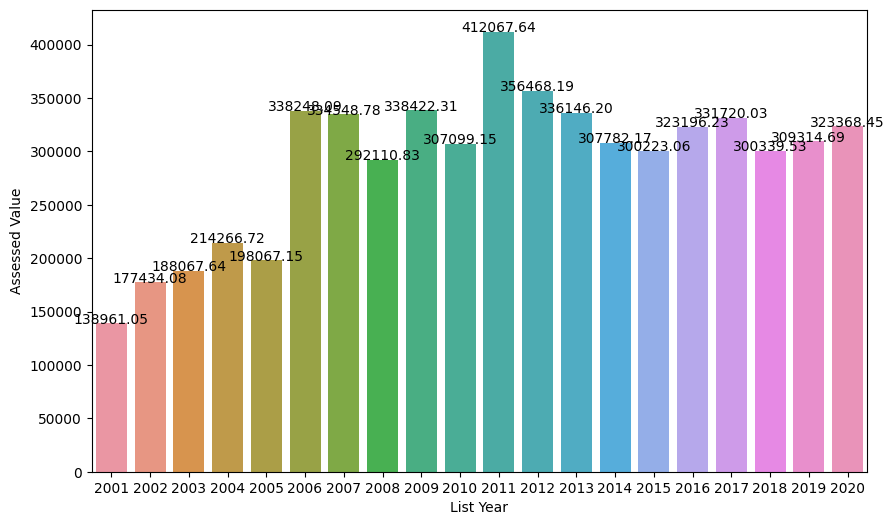

In [31]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='List Year',y='Assessed Value',data=a)
for index,value in enumerate(a["Assessed Value"]):
    ax.text(index,value+0.02,f'{value:.2f}',ha='center')
plt.show()


In [21]:
df["List Year"]=pd.to_numeric(df["List Year"],errors='coerce',downcast='integer')

In [33]:
b=df.groupby('List Year')['Sale Amount'].mean().reset_index()

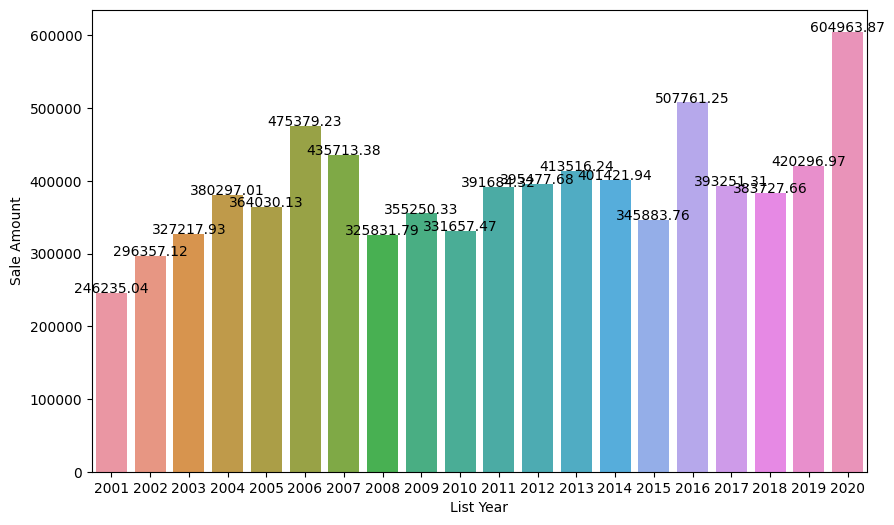

In [36]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='List Year',y='Sale Amount',data=b)
for index,value in enumerate(b["Sale Amount"]):
    ax.text(index,value+0.02,f'{value:0.2f}',ha='center')

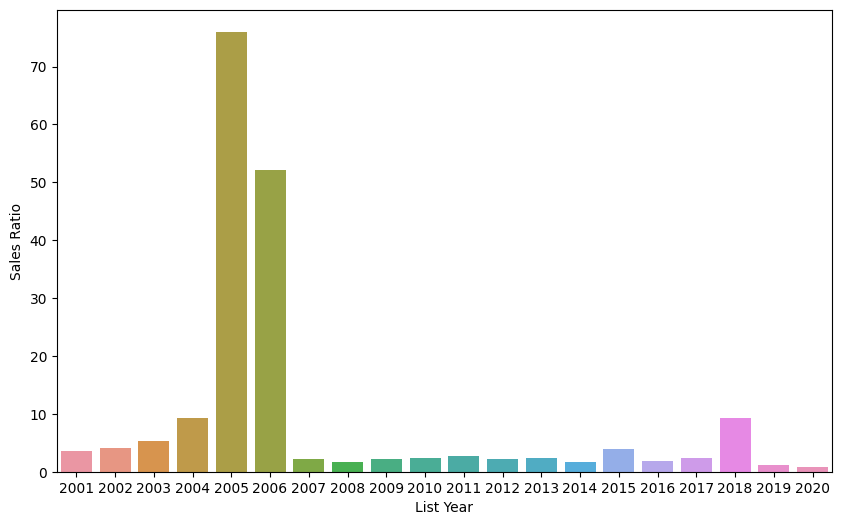

In [39]:
c=df.groupby('List Year')["Sales Ratio"].mean().reset_index()
plt.figure(figsize=(10,6))
ax=sns.barplot(x='List Year',y='Sales Ratio',data=c)

In [43]:
df['Property Type'].unique()

array(['Commercial', 'Residential', 'Vacant Land', 'Nan', 'Apartments',
       'Industrial', 'Public Utility', 'Condo', 'Two Family',
       'Three Family', 'Single Family', 'Four Family'], dtype=object)

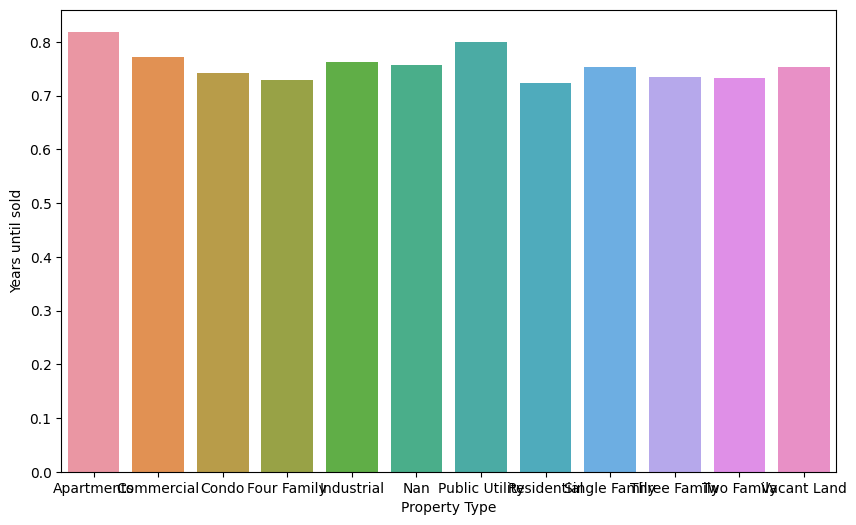

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x='Property Type',y='Years until sold',data=df.groupby('Property Type')['Years until sold'].mean().reset_index())
plt.show()

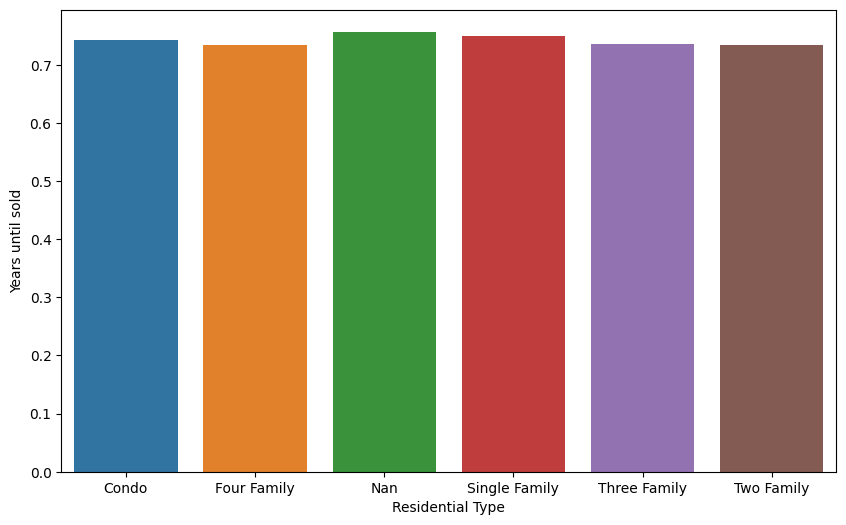

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x='Residential Type',y='Years until sold',data=df.groupby('Residential Type')['Years until sold'].mean().reset_index())
plt.show()